In [1]:
import pandas as pd
data= pd.read_csv("parkinsons_2009.csv")

In [2]:
data.drop(["subject#","test_time"], axis=1, inplace=True)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state= 42, init = 'k-means++')
kmeans.fit(data)

c:\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KMeans(n_clusters=4, random_state=42)

In [4]:
data['clusters']=kmeans.labels_
data.head()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,1
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1


In [5]:
# Possibe clusters with some sort of logic
# motor_UPDRS
# 0 10-30
# 1 24-40
# 2 5-20
# 3 16-34

# 0-20-30-40

# 2-0-3-1

In [6]:
# total UPDRS
# 0 15-35
# 1 33-54
# 2 7-27
# 3 23-44

# 2-0-3-1

In [7]:
#plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.manifold import TSNE

In [8]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(data.sample(5000)))
plotX.columns = data.columns

In [9]:
#Set our perplexity 30-50
perplexity = 150
#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)
#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["clusters"], axis=1)))
#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]
plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')
cluster0 = plotX[plotX["clusters"] == 0]
cluster1 = plotX[plotX["clusters"] == 1]
cluster2 = plotX[plotX["clusters"] == 2]
cluster3 = plotX[plotX["clusters"] == 3]


c:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [10]:
#Instructions for building the 2-D plot
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["TC1_2d"],
                    y = cluster3["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 0, 150, 0.8)'),
                    text = None)
graph = [trace1, trace2, trace3,trace4]

title = "Visualizing Clusters"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = graph, layout = layout)

iplot(fig)

In [11]:
data.head()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,1
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1


In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[['clusters']]).toarray()
x = data.drop(['clusters'], axis = 1)
x = np.array(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)
from keras.models import Sequential
from keras.layers import Dense
in_dim = len(data.columns)-1
 
model = Sequential()
model.add(Dense(20, input_dim = in_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data=([x_test, y_test]), epochs = 40, batch_size = 25)
scores = model.evaluate(x_test, y_test)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f" % (m, scores[i]))

Epoch 1/40
212/212 [==============================] - 1s 2ms/step - loss: 0.9464 - accuracy: 0.6380 - val_loss: 0.6271 - val_accuracy: 0.7653
Epoch 2/40
212/212 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7931 - val_loss: 0.4703 - val_accuracy: 0.8061
Epoch 3/40
212/212 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8205 - val_loss: 0.3835 - val_accuracy: 0.8384
Epoch 4/40
212/212 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8631 - val_loss: 0.3243 - val_accuracy: 0.8673
Epoch 5/40
212/212 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.8829 - val_loss: 0.2630 - val_accuracy: 0.8929
Epoch 6/40
212/212 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.8960 - val_loss: 0.2393 - val_accuracy: 0.9099
Epoch 7/40
212/212 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8994 - val_loss: 0.1984 - val_accuracy: 0.9269
Epoch 

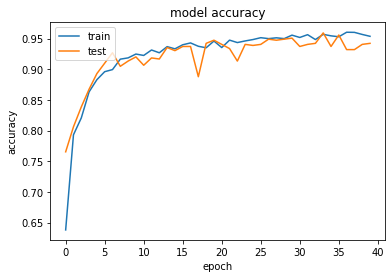

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

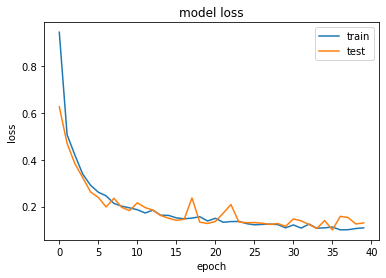

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()